In [ ]:
# The US authorities have registered the names of all US citizens born since 1880. The record is publicly available. 
# For data protection reasons, only names that have been used at least 5 times are listed in the data record.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# defining a function that can read the txt file for a given year and creates a dataframe for that year

In [3]:
def parse_dataset(year):
    """
    based on an input year, follows the path for that year and creates a dataframe for that year
    """
    path = f'../data/yob{year}.txt'
    df = pd.read_csv(path, names=['name', 'gender', 'frequency'])
    return df

In [4]:
# checking the data for 2 yeard

parse_dataset(year=1880)

,name,gender,frequency
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [5]:
parse_dataset(2020)

,name,gender,frequency
0,Olivia,F,17641
1,Emma,F,15656
2,Ava,F,13160
3,Charlotte,F,13065
4,Sophia,F,13036
...,...,...,...
31448,Zykell,M,5
31449,Zylus,M,5
31450,Zymari,M,5
31451,Zyn,M,5


In [6]:
# evaluating the most frequent names for the year 2000

parse_dataset(2020).sort_values(by='frequency', ascending=False)


# Liam and Noah were the most popular names for M-assigned babies for 2020 (due to Oasis, Gallagher)

,name,gender,frequency
17447,Liam,M,19777
17448,Noah,M,18364
0,Olivia,F,17641
1,Emma,F,15656
17449,Oliver,M,14234
...,...,...,...
16646,Melaine,F,5
16645,Mekenna,F,5
16644,Meisa,F,5
16643,Meilee,F,5


#### How many babies were born in the 1900, 1950, 2000 and 2020 (total number of babies)?

In [7]:
parse_dataset(1900)['frequency'].sum() 

450270

In [8]:
parse_dataset(1950)['frequency'].sum() 

3503444

In [9]:
parse_dataset(2000)['frequency'].sum()

3779380

In [10]:
parse_dataset(2020)['frequency'].sum() 

3327419

#### How many babies were male vs female for the years 1950 and 2020?

In [11]:
# for the year 1950 - Females

female_mask= parse_dataset(year=1950)['gender'] == "F"
parse_dataset(year=1950)[female_mask]['frequency'].sum() 

1713054

In [12]:
# for the year 1950 - Males

female_mask= parse_dataset(year=1950)['gender'] == "M"
parse_dataset(year=1950)[female_mask]['frequency'].sum() 

1790390

In [13]:
# for the year 2020 - Females

female_mask= parse_dataset(year=2020)['gender'] == "F"
parse_dataset(year=2020)[female_mask]['frequency'].sum() 

1609171

In [14]:
# for the year 2020 - Males

female_mask= parse_dataset(year=2020)['gender'] == "M"
parse_dataset(year=2020)[female_mask]['frequency'].sum() 

1718248

#### What was the name diversity for males and females for the years 1950 and 2020?

In [15]:
parse_dataset(1950)['gender'].value_counts()

F    6110
M    4195
Name: gender, dtype: int64

In [16]:
parse_dataset(2020)['gender'].value_counts() 

# Name diversity has dramatically increased

F    17447
M    14006
Name: gender, dtype: int64

### creating a complete dataframe for all the years

In [17]:
df = pd.DataFrame(columns=['name','gender','frequency']) 

In [18]:
for year in range(1880, 2022):
    df_temp = parse_dataset(year)
    df_temp['year']=year
    df=pd.concat([df, df_temp])

In [19]:
df.head()

,name,gender,frequency,year
0,Mary,F,7065,1880.0
1,Anna,F,2604,1880.0
2,Emma,F,2003,1880.0
3,Elizabeth,F,1939,1880.0
4,Minnie,F,1746,1880.0


In [20]:
df.info()

# frequency is a string and year is a float. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052781 entries, 0 to 31536
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   name       object 
 1   gender     object 
 2   frequency  object 
 3   year       float64
dtypes: float64(1), object(3)
memory usage: 78.3+ MB


In [27]:
# Changing the datatypes of 'frequency' and 'year' to integers

df['frequency'] = df['frequency'].astype(int)
df['year'] = df[['year']].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052781 entries, 0 to 31536
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   name       object
 1   gender     object
 2   frequency  int32 
 3   year       int32 
dtypes: int32(2), object(2)
memory usage: 62.6+ MB


In [29]:
# Changing the datatypes of 'frequency' and 'year' to strings

df['frequency'] = df['frequency'].astype('str')
df['year'] = df[['year']].astype('str')

In [31]:
df.to_csv('../data/baby_names_all_years.csv', index=False)

In [32]:
full_dataframe =pd.read_csv('../data/baby_names_all_years.csv')

In [33]:
full_dataframe

,name,gender,frequency,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2052776,Zyeire,M,5,2021
2052777,Zyel,M,5,2021
2052778,Zyian,M,5,2021
2052779,Zylar,M,5,2021


#### What is the most popular names of all times in a year?

In [35]:
full_dataframe.sort_values(by='frequency', ascending=False)

# Linda and James in 1947

,name,gender,frequency,year
431064,Linda,F,99693,1947
441435,Linda,F,96212,1948
437168,James,M,94762,1947
544671,Michael,M,92723,1957
437169,Robert,M,91651,1947
...,...,...,...,...
1349751,Momoka,F,5,2000
1349750,Mollyann,F,5,2000
1349749,Molleigh,F,5,2000
1349748,Moises,F,5,2000


In [ ]:
# creating a boolean mask for the name 'Martin'

In [36]:
martin_mask = full_dataframe['name']=="Martin"

full_dataframe[martin_mask]

,name,gender,frequency,year
986,Martin,M,357,1880
2983,Martin,M,327,1881
5009,Martin,M,387,1882
7160,Martin,M,377,1883
9365,Martin,M,385,1884
...,...,...,...,...
1911563,Martin,M,1282,2017
1943908,Martin,M,1295,2018
1975970,Martin,M,1248,2019
2007530,Martin,M,1163,2020


In [ ]:
# How many entries are the in the 'Martin' DataFrame? 
# 242 rows

# How many years are in the dataframe? 
# 2021-1880 = 142 years

# Why are there more entries of the name 'Martin' than years? 
# Female Martins


In [37]:
# In how many years does the name 'Martin' appear for both genders?

# Males
full_dataframe.loc[(full_dataframe['name'] == 'Martin') & (full_dataframe['gender']=='M')]['name'].count()

# Male Martins names exist for every year in the dataframe

142

In [38]:
# In how many years does the name 'Martin' appear for both genders?

# Females
full_dataframe.loc[(full_dataframe['name'] == 'Martin') & (full_dataframe['gender']=='F')]['name'].count()

# In 100 years, the name 'Martin' appears in both genders

100

In [42]:
# Filter the combined dataframe for only names (males and females) 
# that have a frequency over 2000 and for years starting from 2000. 
# What is the most common name since 2000?

mask2000 = (full_dataframe['year'] >= 2000.0) & (full_dataframe['frequency'] > 2000)

full_dataframe[mask2000].sort_values(by="frequency", ascending=False)

,name,gender,frequency,year
1350666,Jacob,M,34489,2000
1380760,Jacob,M,32560,2001
1350667,Michael,M,32040,2000
1411148,Jacob,M,30580,2002
1380761,Michael,M,29687,2001
...,...,...,...,...
1911479,Lorenzo,M,2003,2017
1643965,Erick,M,2003,2009
1454992,Delaney,F,2002,2004
1793558,Emilia,F,2001,2014


In [44]:
# how many unique names exist after the year 2000 (recent) with a freq more than 2000 (common)?

full_dataframe[mask2000]['name'].nunique()

605

In [45]:
# What are these 605 recent common names?

full_dataframe[mask2000]['name'].unique()

array(['Emily', 'Hannah', 'Madison', 'Ashley', 'Sarah', 'Alexis',
       'Samantha', 'Jessica', 'Elizabeth', 'Taylor', 'Lauren', 'Alyssa',
       'Kayla', 'Abigail', 'Brianna', 'Olivia', 'Emma', 'Megan', 'Grace',
       'Victoria', 'Rachel', 'Anna', 'Sydney', 'Destiny', 'Morgan',
       'Jennifer', 'Jasmine', 'Haley', 'Julia', 'Kaitlyn', 'Nicole',
       'Amanda', 'Katherine', 'Natalie', 'Hailey', 'Alexandra',
       'Savannah', 'Chloe', 'Rebecca', 'Stephanie', 'Maria', 'Sophia',
       'Mackenzie', 'Allison', 'Isabella', 'Mary', 'Amber', 'Danielle',
       'Gabrielle', 'Jordan', 'Brooke', 'Michelle', 'Sierra', 'Katelyn',
       'Andrea', 'Madeline', 'Sara', 'Kimberly', 'Courtney', 'Erin',
       'Brittany', 'Vanessa', 'Jenna', 'Jacqueline', 'Caroline', 'Faith',
       'Makayla', 'Bailey', 'Paige', 'Shelby', 'Melissa', 'Kaylee',
       'Christina', 'Trinity', 'Mariah', 'Caitlin', 'Autumn', 'Marissa',
       'Angela', 'Breanna', 'Catherine', 'Zoe', 'Briana', 'Jada', 'Laura',
       'Cla

In [49]:
# Filter the combined dataframe for only females 
# that have a frequency over 2000 and for years starting from 2000. 
# What is the most common female name since 2000?

df2000 = full_dataframe[mask2000]
female2000 = df2000[df2000['gender'] == "F"].sort_values(by=["frequency"], ascending=False)
female2000.head(1)

,name,gender,frequency,year
1333008,Emily,F,25957,2000


In [50]:
# What is the percentage of names that have a frequency larger than 100?

freq_over100 = full_dataframe[full_dataframe['frequency'] > 100]

num_unique_filtered_names = len(freq_over100['name'].unique())

percentage = num_unique_filtered_names / len(full_dataframe['name'].unique()) * 100
percentage

7.242100692731255

In [54]:
# Filter the combined dataset for the name Emily

nameEmily = full_dataframe[full_dataframe['name'] == 'Emily']
nameEmily

,name,gender,frequency,year
99,Emily,F,210,1880
2089,Emily,F,244,1881
4028,Emily,F,272,1882
6141,Emily,F,342,1883
8225,Emily,F,364,1884
...,...,...,...,...
1984795,Emily,M,8,2019
1989808,Emily,F,6899,2020
2014374,Emily,M,11,2020
2021264,Emily,F,6541,2021


In [55]:
# Filter that for only females with the name Emily
nameEmilyF = nameEmily[nameEmily['gender'] == 'F']
nameEmilyF

,name,gender,frequency,year
99,Emily,F,210,1880
2089,Emily,F,244,1881
4028,Emily,F,272,1882
6141,Emily,F,342,1883
8225,Emily,F,364,1884
...,...,...,...,...
1892885,Emily,F,9803,2017
1925533,Emily,F,8700,2018
1957729,Emily,F,8237,2019
1989808,Emily,F,6899,2020


In [56]:
# Filter that for only males with the name Emily
nameEmilyM = nameEmily[nameEmily['gender'] == 'M']
nameEmilyM

,name,gender,frequency,year
42811,Emily,M,5,1896
104246,Emily,M,6,1912
138339,Emily,M,5,1916
168503,Emily,M,6,1919
178812,Emily,M,7,1920
...,...,...,...,...
1924120,Emily,M,5,2017
1950890,Emily,M,11,2018
1984795,Emily,M,8,2019
2014374,Emily,M,11,2020


In [57]:
## Arielle vs Ariel (for males and for females)

nameArielle = full_dataframe[full_dataframe['name'] == 'Arielle']
nameArielle

,name,gender,frequency,year
601955,Arielle,F,7,1962
649992,Arielle,F,9,1966
690523,Arielle,F,5,1969
700783,Arielle,F,14,1970
715830,Arielle,F,13,1971
732809,Arielle,F,8,1972
747831,Arielle,F,9,1973
761616,Arielle,F,17,1974
777806,Arielle,F,18,1975
793981,Arielle,F,26,1976


In [58]:
nameAriel = full_dataframe[full_dataframe['name'] == 'Ariel']
nameAriel

,name,gender,frequency,year
29566,Ariel,F,5,1892
35354,Ariel,F,5,1894
50839,Ariel,F,5,1899
54213,Ariel,F,5,1900
67566,Ariel,F,6,1904
...,...,...,...,...
1976237,Ariel,M,510,2019
1989990,Ariel,F,1459,2020
2007800,Ariel,M,495,2020
2021465,Ariel,F,1331,2021


In [59]:
nameArielleF = nameArielle[nameArielle['gender'] == 'F']
nameArielleF

,name,gender,frequency,year
601955,Arielle,F,7,1962
649992,Arielle,F,9,1966
690523,Arielle,F,5,1969
700783,Arielle,F,14,1970
715830,Arielle,F,13,1971
732809,Arielle,F,8,1972
747831,Arielle,F,9,1973
761616,Arielle,F,17,1974
777806,Arielle,F,18,1975
793981,Arielle,F,26,1976


In [60]:
nameArielF = nameAriel[nameAriel['gender'] == 'F']
nameArielF

,name,gender,frequency,year
29566,Ariel,F,5,1892
35354,Ariel,F,5,1894
50839,Ariel,F,5,1899
54213,Ariel,F,5,1900
67566,Ariel,F,6,1904
...,...,...,...,...
1893015,Ariel,F,2069,2017
1925675,Ariel,F,1818,2018
1957889,Ariel,F,1678,2019
1989990,Ariel,F,1459,2020


In [61]:
nameArielleM = nameArielle[nameArielle['gender'] == 'M']
nameArielleM

,name,gender,frequency,year
999825,Arielle,M,7,1986
1063529,Arielle,M,21,1989
1092304,Arielle,M,6,1990
1142765,Arielle,M,6,1992
2017897,Arielle,M,6,2020


In [62]:
nameArielM = nameAriel[nameAriel['gender'] == 'M']
nameArielM

,name,gender,frequency,year
111332,Ariel,M,5,1913
118239,Ariel,M,9,1914
127785,Ariel,M,7,1915
137429,Ariel,M,7,1916
146821,Ariel,M,9,1917
...,...,...,...,...
1911769,Ariel,M,600,2017
1944218,Ariel,M,470,2018
1976237,Ariel,M,510,2019
2007800,Ariel,M,495,2020


In [63]:
# Make a empty dictionary that maps the column names year and total_births to empty lists:

births_dict = {'year':[], 'total_births':[]}

In [64]:
# using a for loop fill in the dictionary and create a dataframe with the total_births for each year
for year in range(1880, 2022):
    births = parse_dataset(year)['frequency'].sum()
    births_dict['year'].append(year)
    births_dict['total_births'].append(births)
yearly_births = pd.DataFrame(births_dict)

In [65]:
yearly_births

,year,total_births
0,1880,201484
1,1881,192690
2,1882,221533
3,1883,216944
4,1884,243461
...,...,...
137,2017,3570234
138,2018,3508655
139,2019,3461444
140,2020,3327419


In [66]:
yearly_births.sort_values(by="total_births", ascending=False)

# Most births between 1880-2021 are in the five years 1957-1961 (post war american dream)

,year,total_births
77,1957,4200929
79,1959,4156655
80,1960,4153991
81,1961,4140745
78,1958,4132611
...,...,...
5,1885,240854
2,1882,221533
3,1883,216944
0,1880,201484


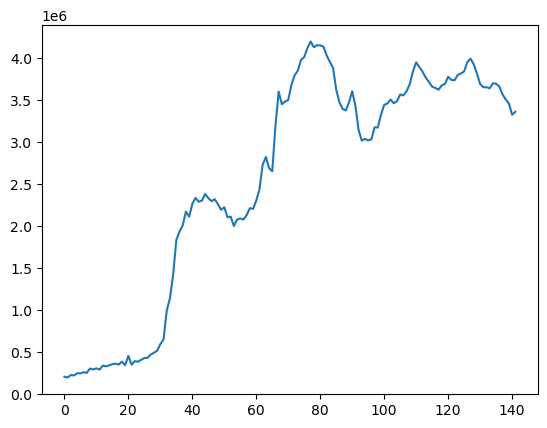

In [69]:
# plotting total births with pandas

yearly_births['total_births'].plot(kind="line");

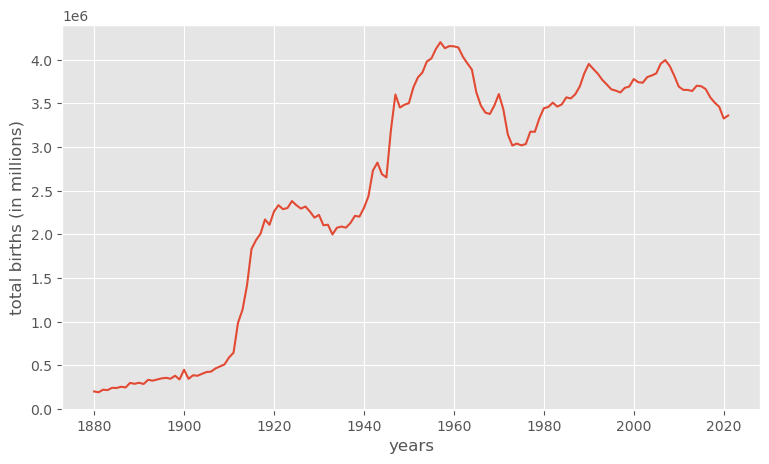

In [71]:
# plotting total births with matplotlib

plt.style.use('ggplot')
plt.figure(figsize=(9, 5))

plt.plot(yearly_births['year'], yearly_births['total_births'], label ='total births per year') 
plt.xlabel('years')
plt.ylabel('total births (in millions)')
plt.show();

#### track a name over time (Arielle vs Ariel)

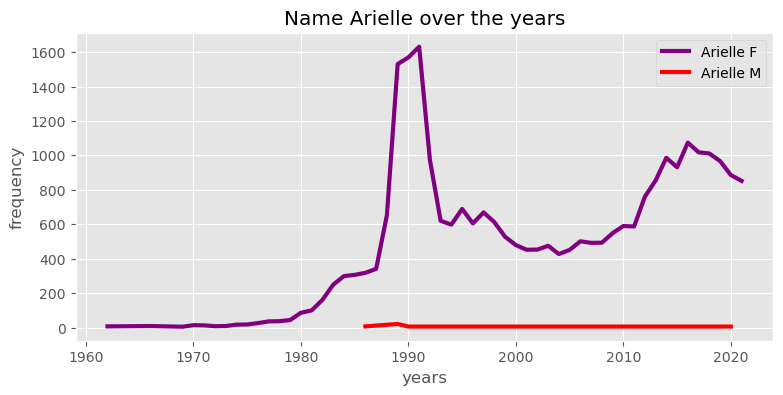

In [75]:
plt.figure(figsize=(9,4))

plt.plot(nameArielleF['year'], nameArielleF['frequency'], label='Arielle F', color='purple', linewidth=3)
plt.plot(nameArielleM['year'], nameArielleM['frequency'], label='Arielle M', color='red', linewidth=3)

plt.title('Name Arielle over the years')

plt.xlabel('years')
plt.ylabel('frequency')

plt.legend();

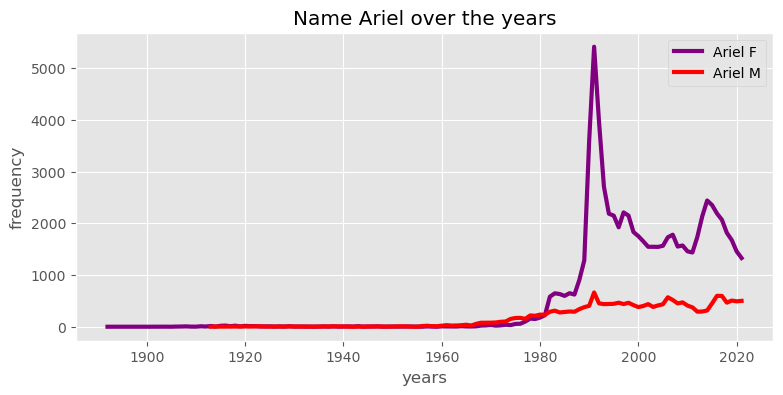

In [74]:
plt.figure(figsize=(9,4))

plt.plot(nameArielF['year'], nameArielF['frequency'], label='Ariel F', color='purple', linewidth=3)
plt.plot(nameArielM['year'], nameArielM['frequency'], label='Ariel M', color='red', linewidth=3)

plt.title('Name Ariel over the years')

plt.xlabel('years')
plt.ylabel('frequency')

plt.legend();

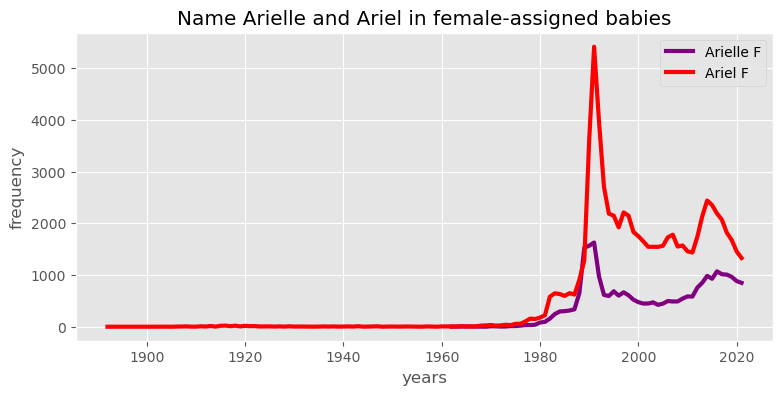

In [79]:
# Arielle vs Ariel (F) plot

plt.figure(figsize=(9,4))

plt.plot(nameArielleF['year'], nameArielleF['frequency'], label='Arielle F', color='purple', linewidth=3)
plt.plot(nameArielF['year'], nameArielF['frequency'], label='Ariel F', color='red', linewidth=3)

#title
plt.title('Name Arielle and Ariel in female-assigned babies')

#axes labels
plt.xlabel('years')
plt.ylabel('frequency')

plt.legend();

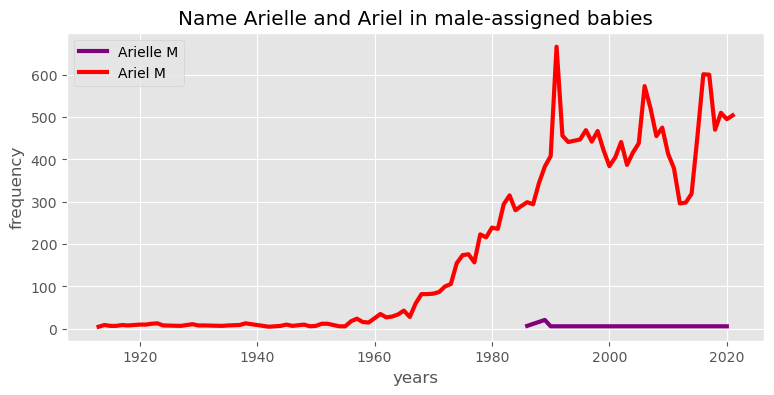

In [80]:
# Arielle vs Ariel (M) plot

plt.figure(figsize=(9,4))

plt.plot(nameArielleM['year'], nameArielleM['frequency'], label='Arielle M', color='purple', linewidth=3)
plt.plot(nameArielM['year'], nameArielM['frequency'], label='Ariel M', color='red', linewidth=3)

#title
plt.title('Name Arielle and Ariel in male-assigned babies')

#axes labels
plt.xlabel('years')
plt.ylabel('frequency')

plt.legend();

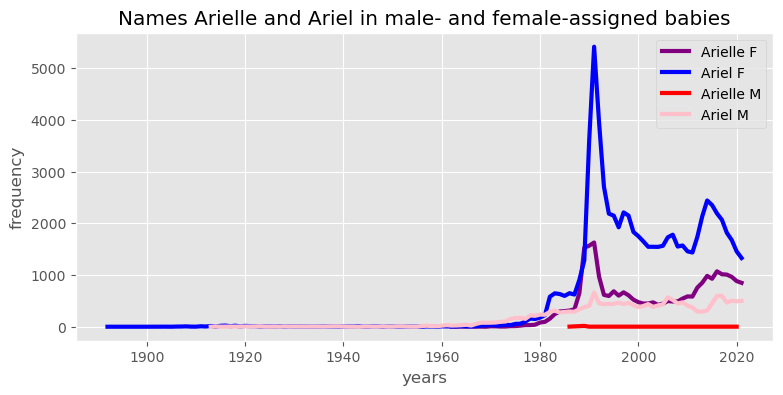

In [84]:
plt.figure(figsize=(9,4))

plt.plot(nameArielleF['year'], nameArielleF['frequency'], label='Arielle F', color='purple', linewidth=3)
plt.plot(nameArielF['year'], nameArielF['frequency'], label='Ariel F', color='blue', linewidth=3)
plt.plot(nameArielleM['year'], nameArielleM['frequency'], label='Arielle M', color='red', linewidth=3)
plt.plot(nameArielM['year'], nameArielM['frequency'], label='Ariel M', color='pink', linewidth=3)

plt.title('Names Arielle and Ariel in male- and female-assigned babies')

plt.xlabel('years')
plt.ylabel('frequency')

plt.legend();

In [85]:
nameUrsula = full_dataframe[full_dataframe['name'] == 'Ursula']
nameUrsula

,name,gender,frequency,year
2820,Ursula,F,6,1881
4605,Ursula,F,9,1882
6874,Ursula,F,7,1883
8929,Ursula,F,9,1884
10940,Ursula,F,19,1885
...,...,...,...,...
1897242,Ursula,F,33,2017
1930275,Ursula,F,29,2018
1963305,Ursula,F,23,2019
1994524,Ursula,F,28,2020


In [86]:
nameUrsulaM = nameUrsula[nameUrsula['gender'] == 'M']
nameUrsulaM

# no male babies with the name 'Ursula'

,name,gender,frequency,year


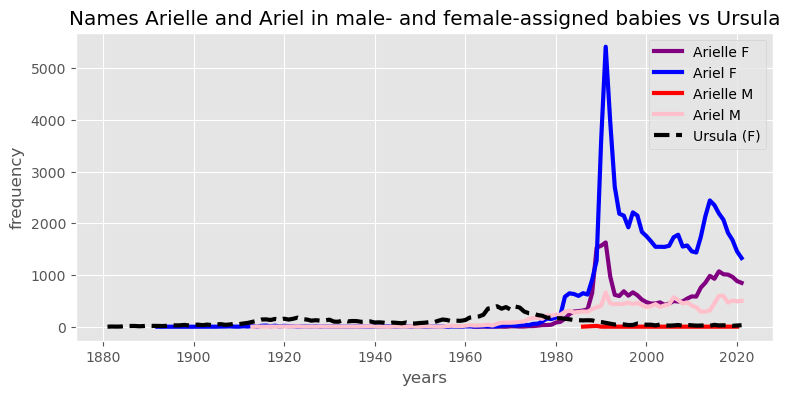

In [87]:
plt.figure(figsize=(9,4))

plt.plot(nameArielleF['year'], nameArielleF['frequency'], label='Arielle F', color='purple', linewidth=3)
plt.plot(nameArielF['year'], nameArielF['frequency'], label='Ariel F', color='blue', linewidth=3)
plt.plot(nameArielleM['year'], nameArielleM['frequency'], label='Arielle M', color='red', linewidth=3)
plt.plot(nameArielM['year'], nameArielM['frequency'], label='Ariel M', color='pink', linewidth=3)
plt.plot(nameUrsula['year'], nameUrsula['frequency'], label='Ursula (F)', color='black', linewidth=3, linestyle='dashed')

plt.title('Names Arielle and Ariel in male- and female-assigned babies vs Ursula')

plt.xlabel('years')
plt.ylabel('frequency')

plt.legend();

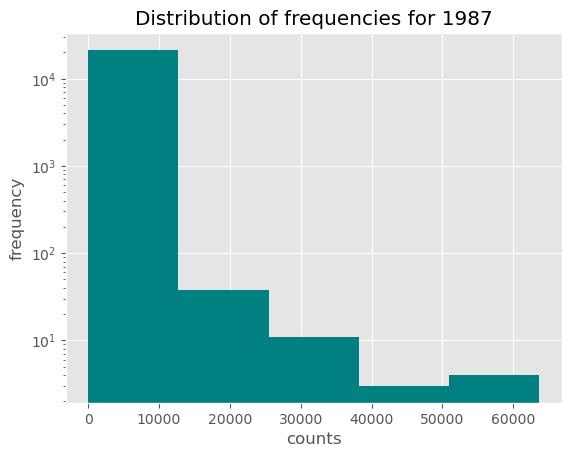

In [90]:
### Vizualize the distribution of names for a given year

plt.hist(parse_dataset(1987)['frequency'], log=True, bins=5, color='teal');

plt.xlabel('counts')
plt.ylabel('frequency')

plt.title('Distribution of frequencies for 1987');

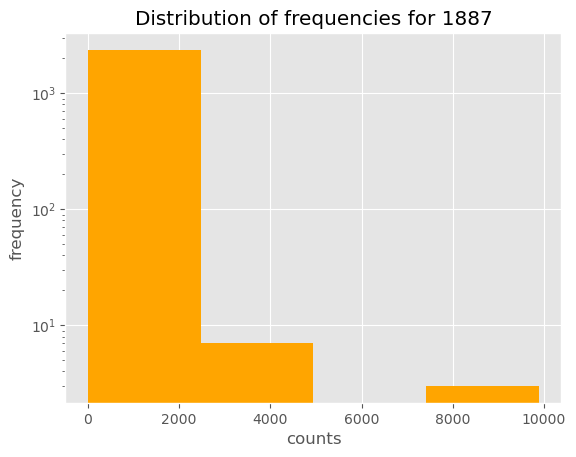

In [92]:
plt.hist(parse_dataset(1887)['frequency'], log=True, bins=4, color='orange');

#axes labels
plt.xlabel('counts')
plt.ylabel('frequency')

#title
plt.title('Distribution of frequencies for 1887');

#### tracking my name over time (Giorgos etc)

In [93]:
nameGiorgos = full_dataframe[full_dataframe['name'] == 'Giorgos']
nameGiorgos

# only 5 times in 2016 (only male-assigned babies)

,name,gender,frequency,year
1891538,Giorgos,M,5,2016


In [94]:
# Let's try Giorgio (italian version)

nameGiorgio = full_dataframe[full_dataframe['name'] == 'Giorgio']
nameGiorgio

# Giorgio in the US since 1961 (only M)

,name,gender,frequency,year
596261,Giorgio,M,5,1961
645176,Giorgio,M,5,1965
655786,Giorgio,M,10,1966
682099,Giorgio,M,6,1968
708867,Giorgio,M,12,1970
724195,Giorgio,M,11,1971
740625,Giorgio,M,7,1972
755858,Giorgio,M,8,1973
788091,Giorgio,M,11,1975
806171,Giorgio,M,8,1976


In [95]:
nameGiorgio['frequency'].sum()

1845

In [96]:
# Let's try Georgios (greek official)

nameGeorgios = full_dataframe[full_dataframe['name'] == 'Georgios']
nameGeorgios

# Georgios in the US since 1970 (only M)

,name,gender,frequency,year
710506,Georgios,M,6,1970
725749,Georgios,M,6,1971
739357,Georgios,M,12,1972
754677,Georgios,M,14,1973
771359,Georgios,M,11,1974
787585,Georgios,M,14,1975
804768,Georgios,M,15,1976
822433,Georgios,M,17,1977
840683,Georgios,M,18,1978
859520,Georgios,M,18,1979


In [97]:
nameGeorgios['frequency'].sum()

977

In [98]:
# Let's try Georg (german version)

nameGeorg = full_dataframe[full_dataframe['name'] == 'Georg']
nameGeorg

,name,gender,frequency,year
128737,Georg,M,5,1915
138387,Georg,M,5,1916
146904,Georg,M,9,1917
157481,Georg,M,8,1918
168539,Georg,M,6,1919
...,...,...,...,...
1758720,Georg,M,5,2012
1822598,Georg,M,7,2014
1888680,Georg,M,7,2016
1954860,Georg,M,6,2018


In [99]:
nameGeorg['frequency'].sum()

490

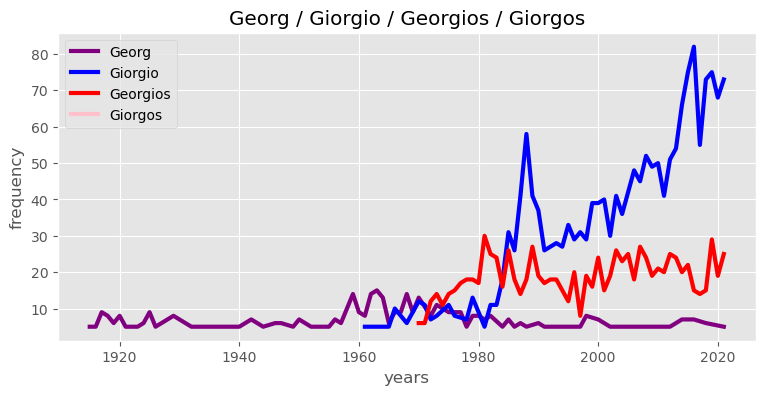

In [100]:
plt.figure(figsize=(9,4))

plt.plot(nameGeorg['year'], nameGeorg['frequency'], label='Georg', color='purple', linewidth=3)
plt.plot(nameGiorgio['year'], nameGiorgio['frequency'], label='Giorgio', color='blue', linewidth=3)
plt.plot(nameGeorgios['year'], nameGeorgios['frequency'], label='Georgios', color='red', linewidth=3)
plt.plot(nameGiorgos['year'], nameGiorgos['frequency'], label='Giorgos', color='pink', linewidth=3)

#title
plt.title('Georg / Giorgio / Georgios / Giorgos')

#axes labels
plt.xlabel('years')
plt.ylabel('frequency')


plt.legend();

In [101]:
# Let's try Georgia

nameGeorgia = full_dataframe[full_dataframe['name'] == 'Georgia']
nameGeorgia

,name,gender,frequency,year
83,Georgia,F,259,1880
2088,Georgia,F,256,1881
4014,Georgia,F,320,1882
6144,Georgia,F,325,1883
8234,Georgia,F,341,1884
...,...,...,...,...
1893115,Georgia,F,1318,2017
1925742,Georgia,F,1418,2018
1957921,Georgia,F,1475,2019
1989967,Georgia,F,1605,2020


In [102]:
nameGeorgiaF = nameGeorgia[nameGeorgia['gender'] == 'F']
nameGeorgiaF

,name,gender,frequency,year
83,Georgia,F,259,1880
2088,Georgia,F,256,1881
4014,Georgia,F,320,1882
6144,Georgia,F,325,1883
8234,Georgia,F,341,1884
...,...,...,...,...
1893115,Georgia,F,1318,2017
1925742,Georgia,F,1418,2018
1957921,Georgia,F,1475,2019
1989967,Georgia,F,1605,2020


In [103]:
nameGeorgiaF['frequency'].sum()

157215

In [104]:
nameGeorgiaM = nameGeorgia[nameGeorgia['gender'] == 'M']
nameGeorgiaM

,name,gender,frequency,year
10348,Georgia,M,5,1884
20065,Georgia,M,5,1888
30892,Georgia,M,5,1892
33769,Georgia,M,5,1893
39746,Georgia,M,5,1895
...,...,...,...,...
633191,Georgia,M,5,1964
825210,Georgia,M,6,1977
921941,Georgia,M,5,1982
941298,Georgia,M,5,1983


In [105]:
nameGeorgiaM['frequency'].sum()

728

In [106]:
# Let's try George

nameGeorge = full_dataframe[full_dataframe['name'] == 'George']
nameGeorge

,name,gender,frequency,year
311,George,F,26,1880
946,George,M,5126,1880
2285,George,F,30,1881
2941,George,M,4664,1881
4247,George,F,32,1882
...,...,...,...,...
1975808,George,M,3186,2019
2002329,George,F,7,2020
2007371,George,M,2761,2020
2033799,George,F,7,2021


In [107]:
nameGeorgeM = nameGeorge[nameGeorge['gender'] == 'M']
nameGeorgeM

,name,gender,frequency,year
946,George,M,5126,1880
2941,George,M,4664,1881
4965,George,M,5193,1882
7119,George,M,4736,1883
9320,George,M,4961,1884
...,...,...,...,...
1911407,George,M,3166,2017
1943763,George,M,3077,2018
1975808,George,M,3186,2019
2007371,George,M,2761,2020


In [108]:
nameGeorgeM['frequency'].sum()

1476135

In [109]:
nameGeorgeF = nameGeorge[nameGeorge['gender'] == 'F']
nameGeorgeF

,name,gender,frequency,year
311,George,F,26,1880
2285,George,F,30,1881
4247,George,F,32,1882
6461,George,F,22,1883
8451,George,F,40,1884
...,...,...,...,...
1744085,George,F,5,2012
1874780,George,F,6,2016
1969407,George,F,8,2019
2002329,George,F,7,2020


In [110]:
nameGeorgeF['frequency'].sum()

9951

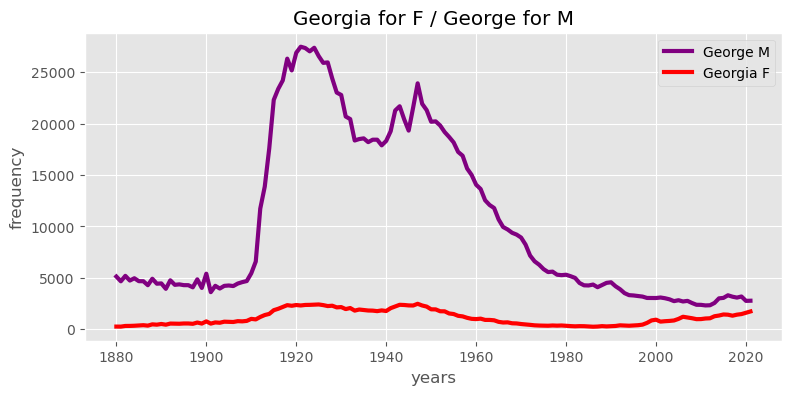

In [111]:
plt.figure(figsize=(9,4))

plt.plot(nameGeorgeM['year'], nameGeorgeM['frequency'], label='George M', color='purple', linewidth=3)
plt.plot(nameGeorgiaF['year'], nameGeorgiaF['frequency'], label='Georgia F', color='red', linewidth=3)

plt.title('Georgia for F / George for M')

plt.xlabel('years')
plt.ylabel('frequency')

plt.legend();

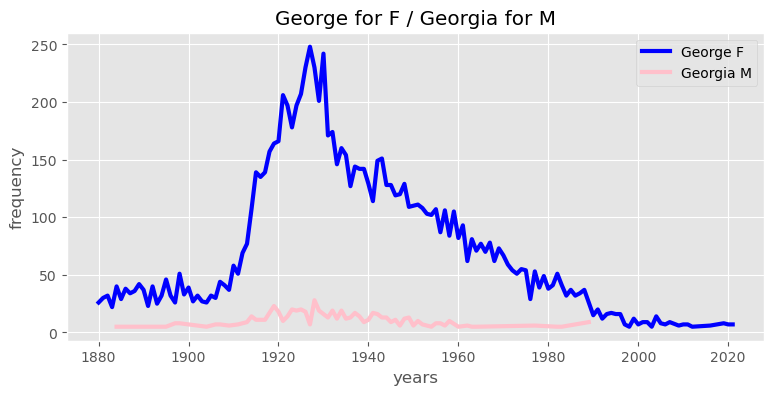

In [112]:
plt.figure(figsize=(9,4))

plt.plot(nameGeorgeF['year'], nameGeorgeF['frequency'], label='George F', color='blue', linewidth=3)
plt.plot(nameGeorgiaM['year'], nameGeorgiaM['frequency'], label='Georgia M', color='pink', linewidth=3)

plt.title('George for F / Georgia for M')

plt.xlabel('years')
plt.ylabel('frequency')

plt.legend();

### Number of unique names over time

In [113]:
unique_names_dict = {'year':[], 'unique_names':[]}

In [114]:
for year in range(1880, 2022):
    unique = parse_dataset(year)['name'].nunique()
    unique_names_dict['year'].append(year)
    unique_names_dict['unique_names'].append(unique)
unique_names_df = pd.DataFrame(unique_names_dict)

In [115]:
unique_names_df.head()

,year,unique_names
0,1880,1889
1,1881,1829
2,1882,2012
3,1883,1962
4,1884,2158


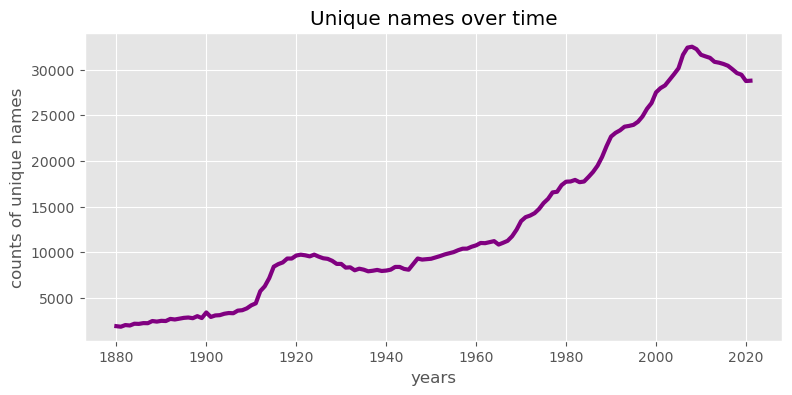

In [119]:
plt.figure(figsize=(9,4))

plt.plot(unique_names_df['year'], unique_names_df['unique_names'], color='purple', linewidth=3)

plt.title('Unique names over time')

plt.xlabel('years')
plt.ylabel('counts of unique names');

### Analyzing the length of names

In [120]:
## for a given year. Here 1987

name_length_dict = {'count':[], 'length':[]}


all_names = parse_dataset(1987)['name']
all_lengths = []       # create an empty list
for name in all_names: 
    length = len(name)
    all_lengths.append(length) # adds the lenghts into the list
    
all_counts = []
for length in all_lengths:
    count = all_lengths.count(length)
    all_counts.append(count)    # adds the counts into the list
    
name_length_dict['length'] = list(dict.fromkeys(all_lengths)) #this is in order to delete duplicates from a list
name_length_dict['count'] = list(dict.fromkeys(all_counts))
    
    
len_df = pd.DataFrame(name_length_dict).sort_values(by='length', ascending = False)
len_df

,count,length
13,7,15
11,12,14
10,20,13
12,39,12
8,103,11
7,313,10
4,1023,9
2,2807,8
0,5055,7
1,5574,6


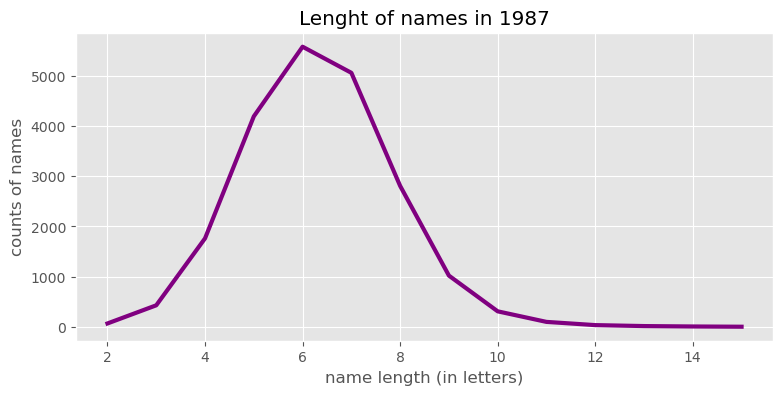

In [122]:
plt.figure(figsize=(9,4))

plt.plot(len_df['length'], len_df['count'], color='purple', linewidth=3)

plt.title('Lenght of names in 1987')

plt.xlabel('name length (in letters)')
plt.ylabel('counts of names');

In [125]:
len_df= len_df.sort_values(by='length')

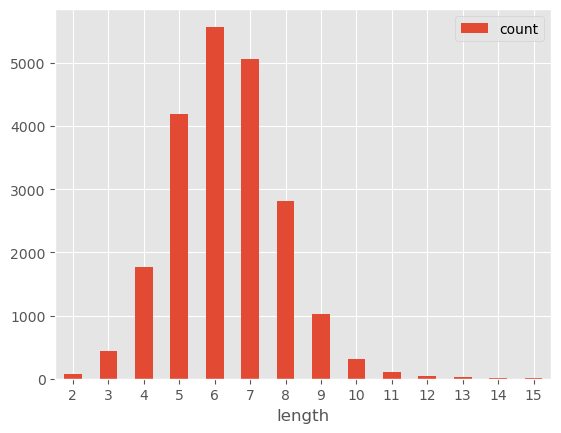

In [126]:
len_df.plot.bar(x='length', y='count', rot=0);

In [127]:
# now for the year 1887 

name_length_dict = {'count':[], 'length':[]}


all_names = parse_dataset(1887)['name']
all_lengths = []       # create an empty list
for name in all_names: 
    length = len(name)
    all_lengths.append(length) # adds the lenghts into the list
    
all_counts = []
for length in all_lengths:
    count = all_lengths.count(length)
    all_counts.append(count)    # adds the counts into the list
    
name_length_dict['length'] = list(dict.fromkeys(all_lengths)) #this is in order to delete duplicates from a list
name_length_dict['count'] = list(dict.fromkeys(all_counts))
    
    
len_df = pd.DataFrame(name_length_dict).sort_values(by='length', ascending = False)
len_df

,count,length
9,2,11
7,23,10
1,82,9
2,166,8
6,353,7
3,643,6
4,568,5
0,398,4
5,131,3
8,7,2


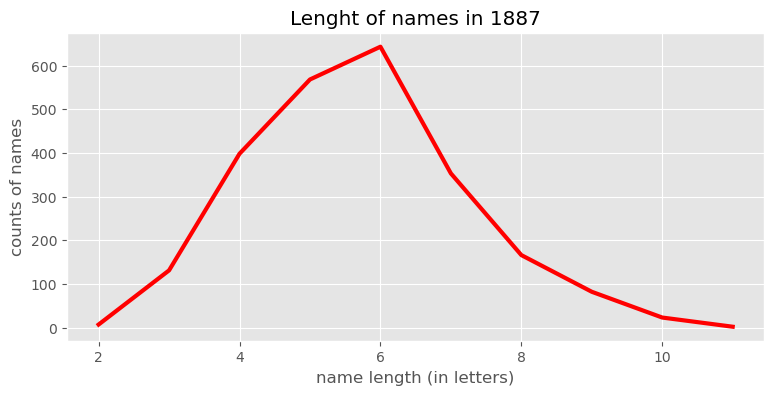

In [128]:
plt.figure(figsize=(9,4))

plt.plot(len_df['length'], len_df['count'], color='red', linewidth=3)

plt.title('Lenght of names in 1887')

plt.xlabel('name length (in letters)')
plt.ylabel('counts of names');

In [130]:
len_df= len_df.sort_values(by='length')

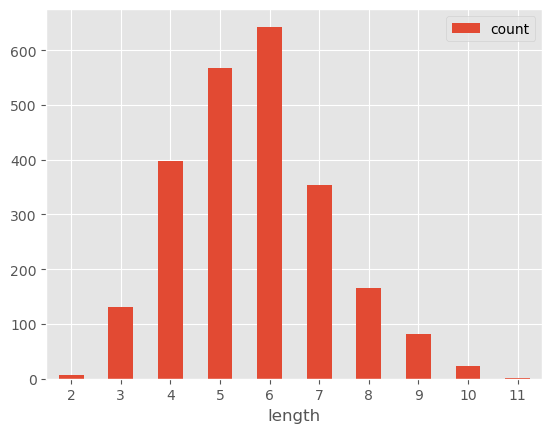

In [131]:
len_df.plot.bar(x='length', y='count', rot=0);

### Plot the average length name over time

In [133]:
full_dataframe

,name,gender,frequency,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2052776,Zyeire,M,5,2021
2052777,Zyel,M,5,2021
2052778,Zyian,M,5,2021
2052779,Zylar,M,5,2021


In [135]:
avg_length_dict = {'year':[], 'length':[]}


for year in range(1880, 2022):
    all_names2 = parse_dataset(year)['name']
    all_lengths2 = []       # create an empty list
    for name in all_names2: 
        length = len(name)
        all_lengths2.append(length) # adds the lenghts into the list
        average = sum(all_lengths2)/len(all_lengths2)
    avg_length_dict['length'].append(average)    
    avg_length_dict['year'].append(year)



In [136]:
avg_len_df = pd.DataFrame(avg_length_dict)

In [137]:
avg_len_df

,year,length
0,1880,5.700000
1,1881,5.673733
2,1882,5.724024
3,1883,5.697217
4,1884,5.716152
...,...,...
137,2017,6.136946
138,2018,6.123400
139,2019,6.104262
140,2020,6.069628


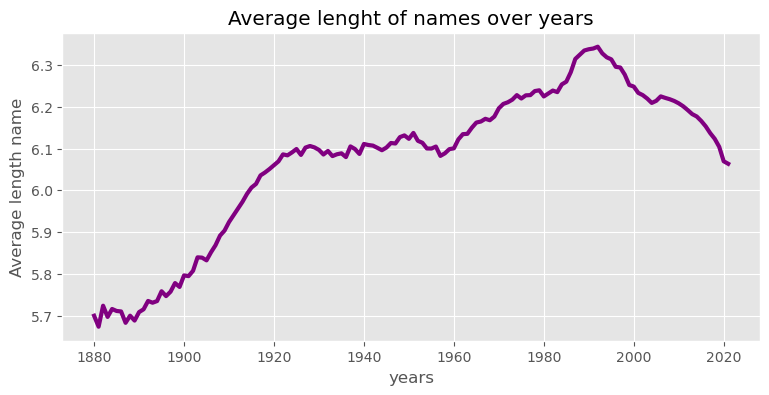

In [138]:
plt.figure(figsize=(9,4))

plt.plot(avg_len_df['year'], avg_len_df['length'], color='purple', linewidth=3)

plt.title('Average lenght of names over years')

plt.xlabel('years')
plt.ylabel('Average length name');